## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [8]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [9]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [1]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline
# 把兩個訓練資料集和測試資料集讀進來
df_test = pd.read_csv('Titanic_test.csv')
df_train = pd.read_csv('Titanic_train.csv')


## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [6]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
'''
暗示，可以用那些函數，來看出資料的欄位變數
'''
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline
# 把兩個訓練資料集和測試資料集讀進來
df_test = pd.read_csv('Titanic_test.csv')
df_train = pd.read_csv('Titanic_train.csv')
print('test:',df_test.columns)
print('train:',df_train.columns)


test: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
train: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [13]:
#可以嘗試用範例的程式
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline
# 把兩個訓練資料集和測試資料集讀進來
df_test = pd.read_csv('Titanic_test.csv')
df_train = pd.read_csv('Titanic_train.csv')
print(df_test.isnull().any())
print(df_test.isnull().any().sum())
print(df_train.isnull().any())
print(df_train.isnull().any().sum())

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
3
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
3


## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [18]:
#合併資料

#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline
# 把兩個訓練資料集和測試資料集讀進來
df_test = pd.read_csv('Titanic_test.csv')
df_train = pd.read_csv('Titanic_train.csv')
data = df_train.append(df_test)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None


In [53]:
# 以 XXX 為例，先看 Cabin  出現值的特性

#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline
# 把兩個訓練資料集和測試資料集讀進來
df_test = pd.read_csv('Titanic_test.csv')
df_train = pd.read_csv('Titanic_train.csv')
data = df_train.append(df_test)
print(data.isnull().sum())

print(data['Cabin'].isnull().sum())#缺失值過多

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64
1014
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory u

In [54]:
可看出'Cabin'缺失值過多，先將其和生存率作圖看影響

SyntaxError: invalid syntax (<ipython-input-54-4ce31140205c>, line 1)

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
--

<function matplotlib.pyplot.show>

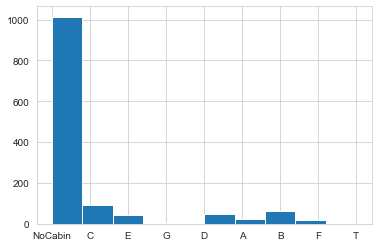

In [ ]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline
# 把兩個訓練資料集和測試資料集讀進來
df_test = pd.read_csv('Titanic_test.csv')
df_train = pd.read_csv('Titanic_train.csv')
data = pd.concat([df_train, df_test], axis = 0, join = 'outer', ignore_index = True)
df = pd.DataFrame(data)
print(df.head())
print('-----')
df["Cabin"] = df["Cabin"].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin') # 將Cabin取開頭的英文字母，不然原本的Cabin欄位種類過多
print(df["Cabin"].unique())
sns.set_style('whitegrid')
plt.hist(df['Cabin'])
plt.show

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
--

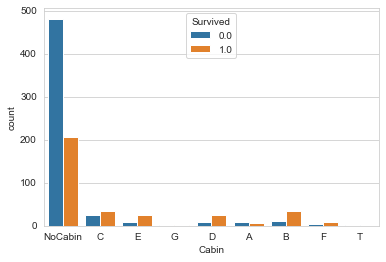

In [ ]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline
# 把兩個訓練資料集和測試資料集讀進來
df_test = pd.read_csv('Titanic_test.csv')
df_train = pd.read_csv('Titanic_train.csv')
data = pd.concat([df_train, df_test], axis = 0, join = 'outer', ignore_index = True) 
df = pd.DataFrame(data)
print(df.head())
print('-----')
df["Cabin"] = df["Cabin"].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin') # 將Cabin取開頭的英文字母
print(df["Cabin"].unique())
sns.set_style('whitegrid')
sns.countplot(data = df, x = 'Cabin', hue = 'Survived')
plt.show()

In [ ]:
可看出NoCabin的死亡機率非常高，故嘗試將其資料刪除再做資料分析

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None


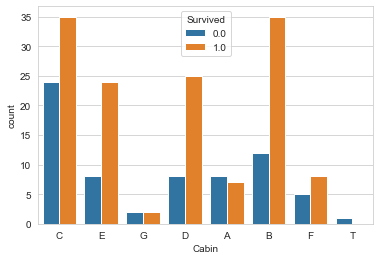

In [67]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline
# 把兩個訓練資料集和測試資料集讀進來
df_test = pd.read_csv('Titanic_test.csv')
df_train = pd.read_csv('Titanic_train.csv')
data = pd.concat([df_train, df_test], axis = 0, join = 'outer', ignore_index = True)
df = pd.DataFrame(data)
df_drop = df.copy()
df_drop['Cabin'] = df_drop['Cabin'].dropna()
print(df_drop.info())
df_drop["Cabin"] = df_drop["Cabin"].str[0:1]
sns.set_style('whitegrid')
sns.countplot(data = df_drop, x = 'Cabin', hue = 'Survived')
plt.show()